In [167]:
# 라이브러리 설치
# !pip install matplotlib

In [168]:
import pandas as pd
import numpy as np
# 현재 컴퓨터의 os를 확인하기 위한 라이브러리
import platform
import matplotlib.pyplot as plt

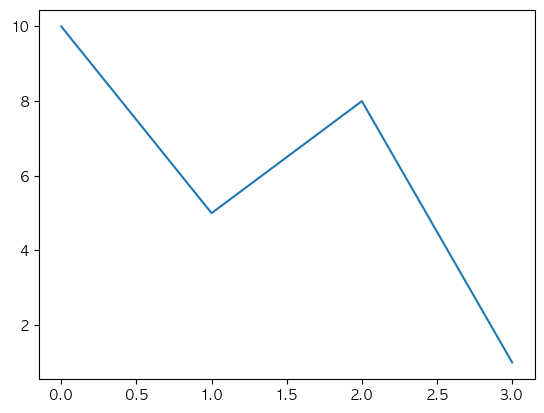

In [169]:
# 라인 그래프 생성
# case1 : y축의 데이터만 존재하는 경우
y = [10, 5, 8, 1]
# 라인 그래프를 그려주는 함수: plot()
plt.plot(y)
plt.show()

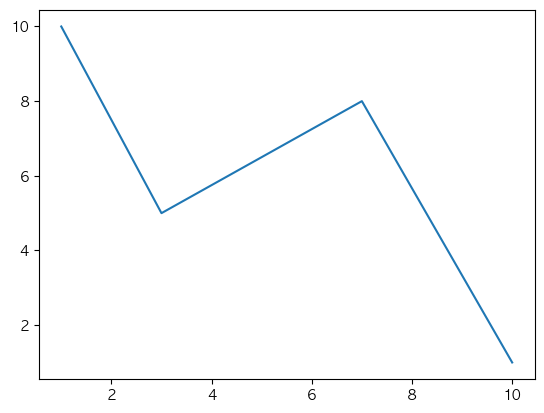

In [170]:
# case2: x축의 데이터와 y축의 데이터가 모두 존재할 때
x = [1, 3, 7, 10]
y = [10, 5, 8, 1]
plt.plot(x, y)

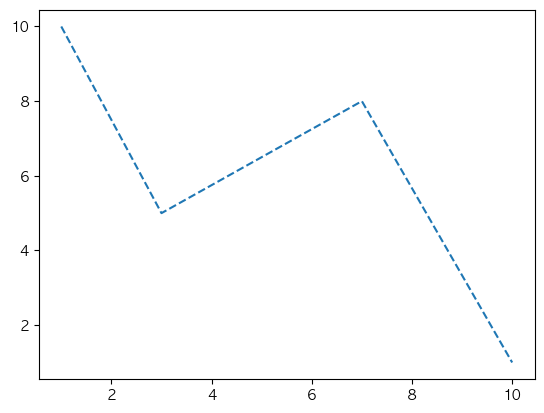

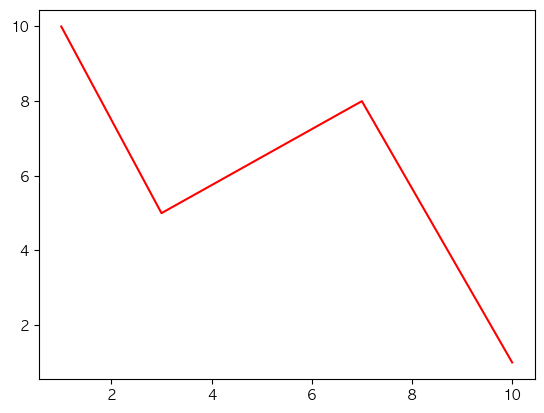

In [171]:
# 선의 종류와 색을 변경
plt.plot(x, y, '--')
plt.show()
plt.plot(x, y, 'r')
plt.show()

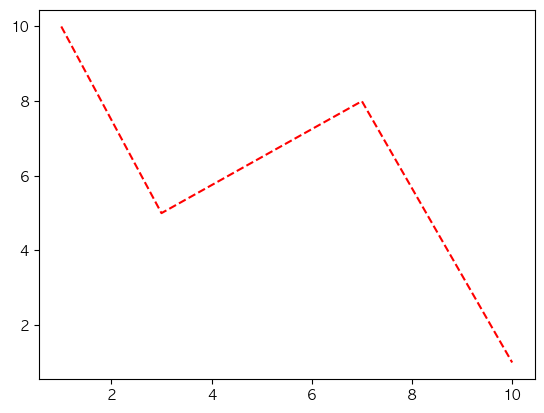

In [172]:
plt.plot(x, y, 'r--')

In [173]:
# matplot에서 한글 깨짐 방지를 위해서 기본 설정 폰트를 변경
# 사용하고 있는 컴퓨터의 os가 MAC인 경우
if platform.system() == 'Darwin':
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

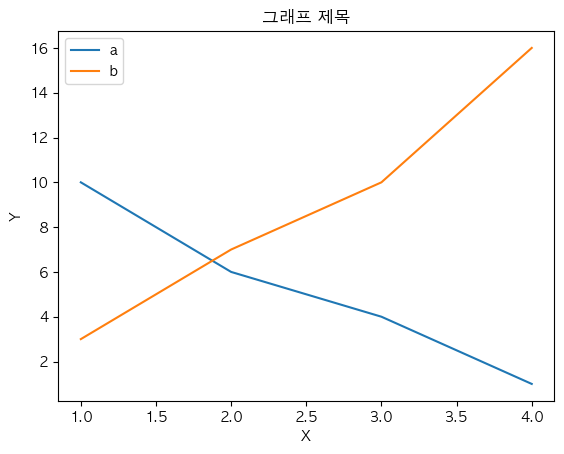

In [174]:
# 하나의 공간에 2개의 라인 그래프 생성
x = [1, 2, 3, 4]
y = [10, 6, 4, 1]
y2 = [3, 7, 10, 16]
plt.plot(x, y)
plt.plot(x, y2)

# x축의 라벨링
plt.xlabel('X')
# y축의 라벨링
plt.ylabel('Y')
# 그래프 제목
plt.title('그래프 제목')
# 그래프별 범례
plt.legend(['a', 'b'])
plt.show()

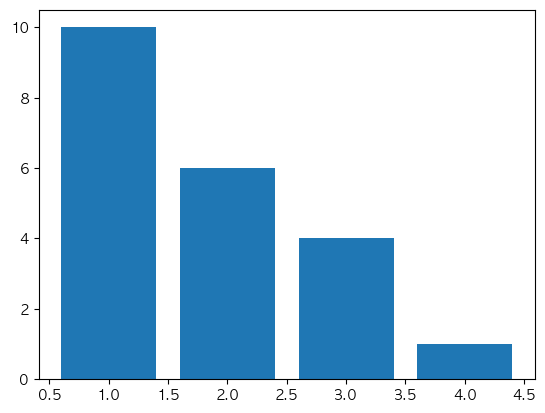

In [175]:
# 막대 그래프
plt.bar(x, y)
plt.show()

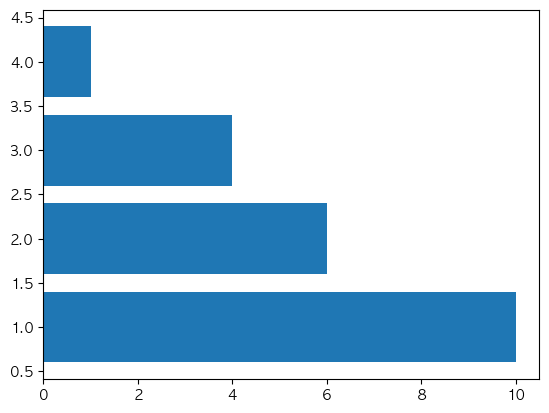

In [176]:
# 수평 막대 그래프
plt.barh(x, y)
plt.show()

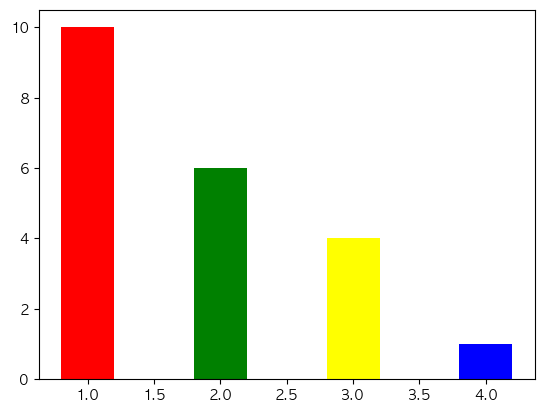

In [177]:
plt.bar(
    x, y, width = 0.4, color = ['red', 'green', 'yellow', 'blue']
)
plt.show()

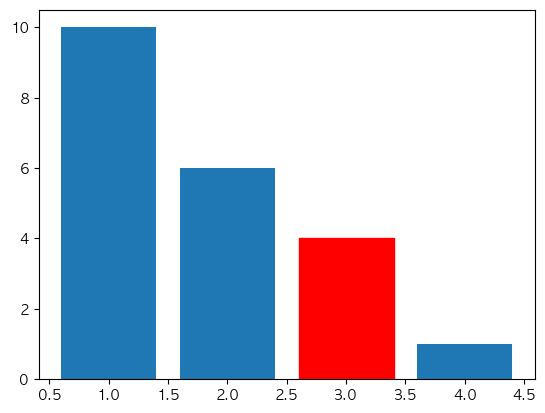

In [178]:
# 막대 그래프에서 특정 막대의 설정을 변경
bar_graph = plt.bar(x,y)

# bar_graph의 3번째 막대(index2)를 선택하여 색상을 변경
bar_graph[2].set_color('r')
plt.show()

In [179]:
# 산점도 그래프
x = np.random.random(50)
y = np.random.random(50)

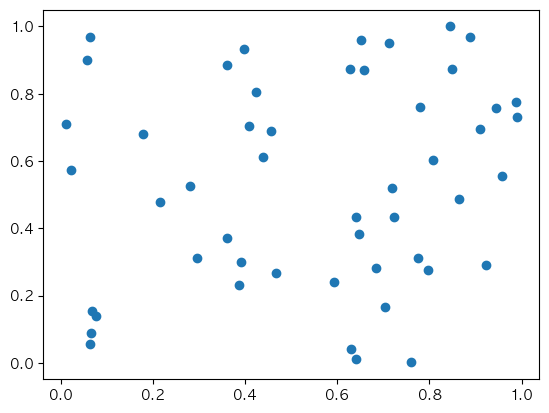

In [180]:
plt.scatter(x, y)

plt.show()

In [181]:
# drinks.csv
df = pd.read_csv('../data_git/csv/drinks.csv')

In [182]:
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [183]:
df.iloc[:, 1:-1].corr('pearson')

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


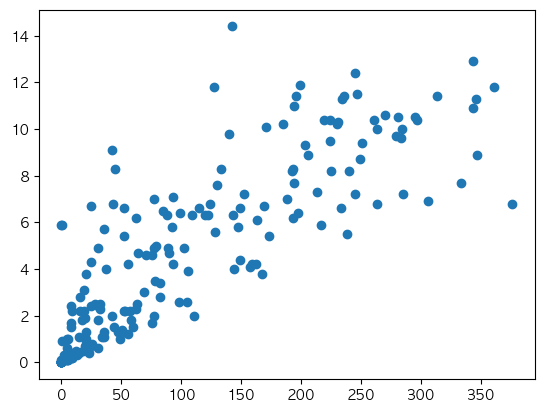

In [184]:
# df에서 맥주 소비량과 순수알콜량의 상관계수가 0.8 이상이다.
# 산점도 확인
x = df['beer_servings']
y = df['total_litres_of_pure_alcohol']
plt.scatter(x, y)
plt.show()

1. csv 폴더 안에 있는 drinks.csv 파일 로드
2. 데이터 프레임의 정보를 확인하고 결측치의 존재를 파악
3. 컬럼의 이름을 변경 ->[국가, 맥주소비량, 증류주 소비량, 와인소비량, 순수알콜량, 대륙]
4. 결측치는 대륙 컬럼에 존재 -> 결측치는 'OT' 대체
5. 파생변수 '총술소비량' -> '맥주소비량' + '증류주소비량' + '와인소비량'
6. 파생변수 '도수 -> (순수알콜량 / 총술소비량) * 100
7. 대륙별 그룹화를 하고 도수의 평균을 구한다. -> 가장 독한 술을 먹은 대륙은 어디인가?

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [186]:
flag = df['country'] == 'South Korea'
df.loc[flag,]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
138,South Korea,140,16,9,9.8,AS


In [187]:
# country 컬럼의 데이터가 고유식별자(primary key) 인가?
len(df['country'].unique())

193

In [188]:
df['country'].value_counts()

country
Afghanistan    1
Libya          1
Niger          1
Nigeria        1
Niue           1
              ..
Greece         1
Grenada        1
Guatemala      1
Guinea         1
Zimbabwe       1
Name: count, Length: 193, dtype: int64

In [189]:
df.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [190]:
# 기본 통계량 정보
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [191]:
# case1
df.rename(columns = {
            'country' :'국가', 
           'beer_servings' : '맥주소비량', 
           'spirit_servings'  : '증류주소비량', 
           'wine_servings' : '와인소비량', 
           'total_litres_of_pure_alcohol': '순수알콜량', 
           'continent' : '대륙'
           }
        )

,국가,맥주소비량,증류주소비량,와인소비량,순수알콜량,대륙
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [192]:
# case2: 데이터프레임 안에 변수 columns에 데이터를 대입
# 유의사항 -> 기존 columns의 개수와 대입하는 데이터의 개수가 같아야한다.
df.columns = ['국가', '맥주 소비량', '증류주 소비량', '와인 소비량', '순수 알콜량', '대륙']

In [193]:
df

,국가,맥주 소비량,증류주 소비량,와인 소비량,순수 알콜량,대륙
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [194]:
df['대륙'] = df['대륙'].fillna('OT')

In [195]:
df.isna().sum()

국가         0
맥주 소비량     0
증류주 소비량    0
와인 소비량     0
순수 알콜량     0
대륙         0
dtype: int64

In [196]:
df.loc[df['대륙'] == 'OT']

,국가,맥주 소비량,증류주 소비량,와인 소비량,순수 알콜량,대륙
5,Antigua & Barbuda,102,128,45,4.9,OT
11,Bahamas,122,176,51,6.3,OT
14,Barbados,143,173,36,6.3,OT
17,Belize,263,114,8,6.8,OT
32,Canada,240,122,100,8.2,OT
41,Costa Rica,149,87,11,4.4,OT
43,Cuba,93,137,5,4.2,OT
50,Dominica,52,286,26,6.6,OT
51,Dominican Republic,193,147,9,6.2,OT
54,El Salvador,52,69,2,2.2,OT


In [197]:
df['총 술 소비량'] = df['맥주 소비량'] + df['증류주 소비량'] + df['와인 소비량']

In [204]:
df['총 술 소비량'] = df.loc[ : , '맥주 소비량': '와인 소비량'].sum(axis=1)

In [199]:
# '도수 -> (순수알콜량 / 총술소비량) * 100
df['평균 도수'] = df['순수 알콜량'] / df['총 술 소비량'] * 100
df

,국가,맥주 소비량,증류주 소비량,와인 소비량,순수 알콜량,대륙,총 술 소비량,평균 도수
0,Afghanistan,0,0,0,0.0,AS,0,NaN
1,Albania,89,132,54,4.9,EU,275,1.781818
2,Algeria,25,0,14,0.7,AF,39,1.794872
3,Andorra,245,138,312,12.4,EU,695,1.784173
4,Angola,217,57,45,5.9,AF,319,1.849530
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,1.766055
189,Vietnam,111,2,1,2.0,AS,114,1.754386
190,Yemen,6,0,0,0.1,AS,6,1.666667
191,Zambia,32,19,4,2.5,AF,55,4.545455


In [200]:
df.loc[df['국가'] == 'South Korea']

,국가,맥주 소비량,증류주 소비량,와인 소비량,순수 알콜량,대륙,총 술 소비량,평균 도수
138,South Korea,140,16,9,9.8,AS,165,5.939394


In [202]:
type(df['순수 알콜량'] )

pandas.core.series.Series